In [0]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where you have saved the unzipped
# 'cs231n' folder containing the '.py', 'classifiers' and 'datasets'
# folders.
# e.g. 'cs231n/assignments/assignment1/cs231n/'
FOLDERNAME = 'cs231n/assignments/cs231n/'

assert FOLDERNAME is not None, "[!] Enter the foldername."

%cd /content/drive/My\ Drive
%cp -r $FOLDERNAME ../../
%cd ../../
%cd cs231n/datasets/
!bash get_datasets.sh
%cd ../../

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive
/content
/content/cs231n/datasets
--2020-04-30 11:15:56--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>

# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [0]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [0]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [0]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularization loss.

In [0]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [0]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
b1 max relative error: 2.738420e-09
W2 max relative error: 3.440708e-09
b2 max relative error: 4.447625e-11


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.02.

Final training loss:  0.014634626220261132


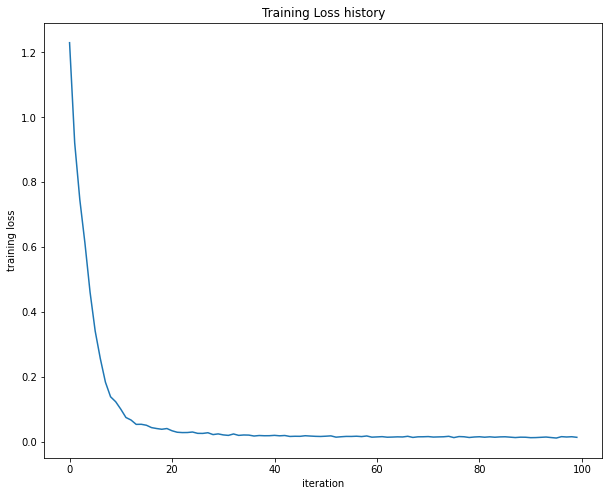

In [0]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [0]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [0]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 2.302987
iteration 100 / 1000: loss 2.302525
iteration 200 / 1000: loss 2.298937
iteration 300 / 1000: loss 2.261471
iteration 400 / 1000: loss 2.185205
iteration 500 / 1000: loss 2.139468
iteration 600 / 1000: loss 2.068498
iteration 700 / 1000: loss 2.052800
iteration 800 / 1000: loss 1.994309
iteration 900 / 1000: loss 2.016473
Validation accuracy:  0.279


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

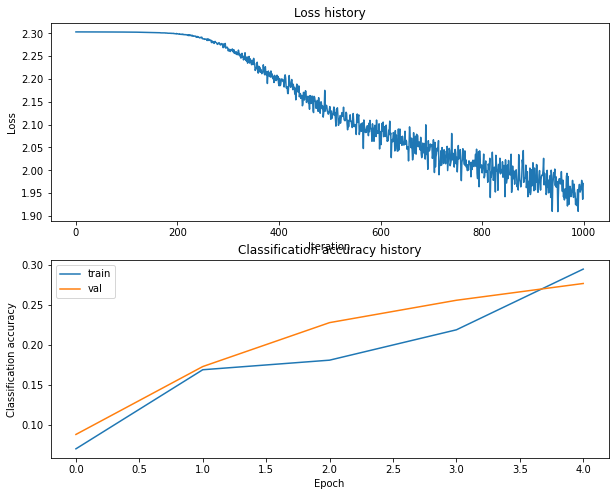

In [0]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

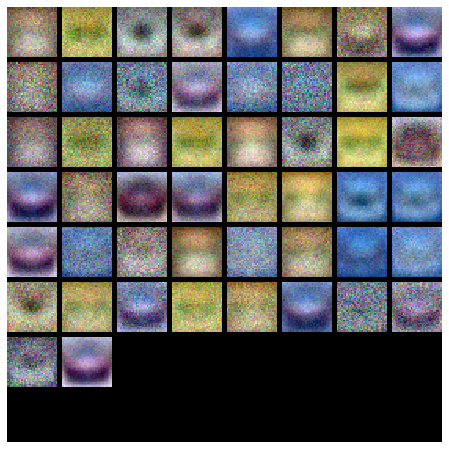

In [0]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$

In [0]:
best_net = None # store the best model into this 
best_val = -1
best_hyperparms = {}
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

learning_rates = [1e-4, 1e-3, 1e-2]
regularization_strengths = [2.5e-2, 2.5e-1, 2.5, 2.5e2]

input_size = 32 * 32 * 3
hidden_sizes = [50,100,150,200]
num_classes = 10

for learning_rate in learning_rates:
    for regularization_strength in regularization_strengths:
        for hidden_size in hidden_sizes:
            net = TwoLayerNet(input_size, hidden_size, num_classes)

            # Train the network
            stats = net.train(X_train, y_train, X_val, y_val,
                        num_iters=1000, batch_size=200,
                        learning_rate=learning_rate, learning_rate_decay=0.95,
                        reg=regularization_strength, verbose=True)
            
            print("learning_rate", learning_rate)
            print("regularization_strength", regularization_strength)
            print("hidden_size", hidden_size)
            # Predict on the validation set
            val_acc = (net.predict(X_val) == y_val).mean()
            print('Validation accuracy: ', val_acc)

            plt.figure()
            plt.subplot(2, 1, 1)
            plt.plot(stats['loss_history'])
            plt.title('Loss history')
            plt.xlabel('Iteration')
            plt.ylabel('Loss')

            plt.subplot(2, 1, 2)
            plt.plot(stats['train_acc_history'], label='train')
            plt.plot(stats['val_acc_history'], label='val')
            plt.title('Classification accuracy history')
            plt.xlabel('Epoch')
            plt.ylabel('Classification accuracy')
            plt.legend()
            plt.show()            

            if val_acc > best_val:
                best_val = val_acc
                best_net = net
                best_hyperparms["learning_rate"] = learning_rate
                best_hyperparms["regularization_strength"] = regularization_strength
                best_hyperparms["hidden_sizes"] = hidden_size

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


iteration 0 / 1500: loss 2.302592
iteration 100 / 1500: loss 2.107255
iteration 200 / 1500: loss 1.920284
iteration 300 / 1500: loss 1.783013
iteration 400 / 1500: loss 1.738077
iteration 500 / 1500: loss 1.693506
iteration 600 / 1500: loss 1.628029
iteration 700 / 1500: loss 1.620579
iteration 800 / 1500: loss 1.550656
iteration 900 / 1500: loss 1.500420
iteration 1000 / 1500: loss 1.504246
iteration 1100 / 1500: loss 1.461699
iteration 1200 / 1500: loss 1.503266
iteration 1300 / 1500: loss 1.427273
iteration 1400 / 1500: loss 1.435506
learning_rate 0.0005
regularization_strength 0.01
hidden_size 80
Validation accuracy:  0.472


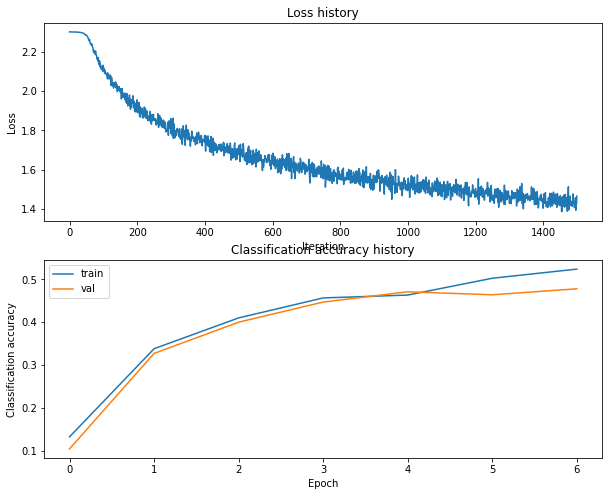

iteration 0 / 1500: loss 2.302619
iteration 100 / 1500: loss 2.107361
iteration 200 / 1500: loss 1.918386
iteration 300 / 1500: loss 1.808965
iteration 400 / 1500: loss 1.722728
iteration 500 / 1500: loss 1.656547
iteration 600 / 1500: loss 1.646881
iteration 700 / 1500: loss 1.614924
iteration 800 / 1500: loss 1.581016
iteration 900 / 1500: loss 1.541509
iteration 1000 / 1500: loss 1.567990
iteration 1100 / 1500: loss 1.484443
iteration 1200 / 1500: loss 1.454672
iteration 1300 / 1500: loss 1.468609
iteration 1400 / 1500: loss 1.390943
learning_rate 0.0005
regularization_strength 0.01
hidden_size 100
Validation accuracy:  0.483


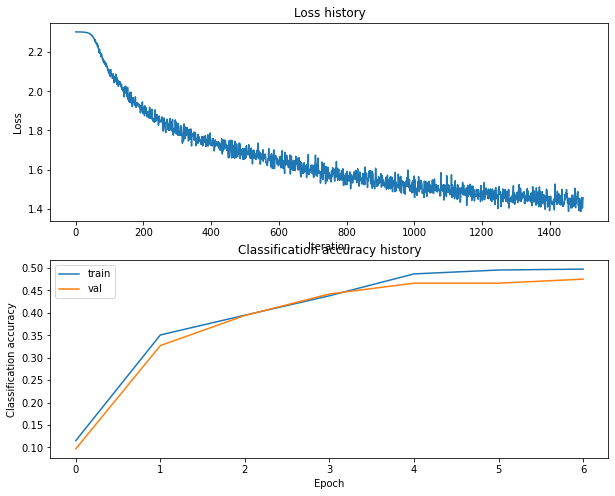

iteration 0 / 1500: loss 2.302608
iteration 100 / 1500: loss 2.085943
iteration 200 / 1500: loss 1.935793
iteration 300 / 1500: loss 1.736597
iteration 400 / 1500: loss 1.699529
iteration 500 / 1500: loss 1.671294
iteration 600 / 1500: loss 1.624082
iteration 700 / 1500: loss 1.582028
iteration 800 / 1500: loss 1.533382
iteration 900 / 1500: loss 1.548949
iteration 1000 / 1500: loss 1.457498
iteration 1100 / 1500: loss 1.496885
iteration 1200 / 1500: loss 1.479660
iteration 1300 / 1500: loss 1.489976
iteration 1400 / 1500: loss 1.448706
learning_rate 0.0005
regularization_strength 0.01
hidden_size 120
Validation accuracy:  0.476


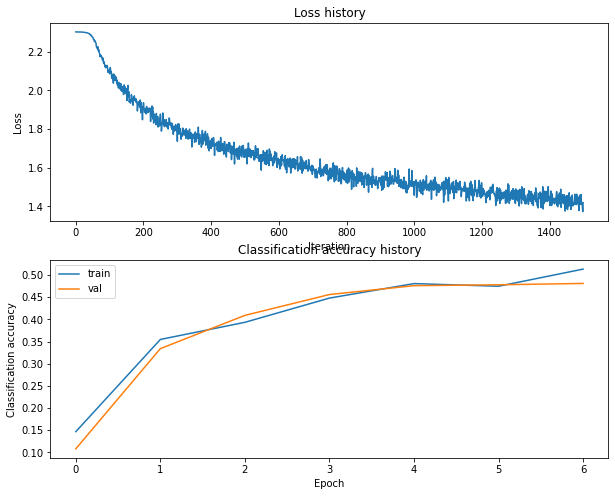

iteration 0 / 1500: loss 2.302639
iteration 100 / 1500: loss 2.083777
iteration 200 / 1500: loss 1.909507
iteration 300 / 1500: loss 1.851483
iteration 400 / 1500: loss 1.744225
iteration 500 / 1500: loss 1.696286
iteration 600 / 1500: loss 1.699452
iteration 700 / 1500: loss 1.602839
iteration 800 / 1500: loss 1.547633
iteration 900 / 1500: loss 1.551073
iteration 1000 / 1500: loss 1.537995
iteration 1100 / 1500: loss 1.545879
iteration 1200 / 1500: loss 1.482534
iteration 1300 / 1500: loss 1.456458
iteration 1400 / 1500: loss 1.485702
learning_rate 0.0005
regularization_strength 0.025
hidden_size 80
Validation accuracy:  0.466


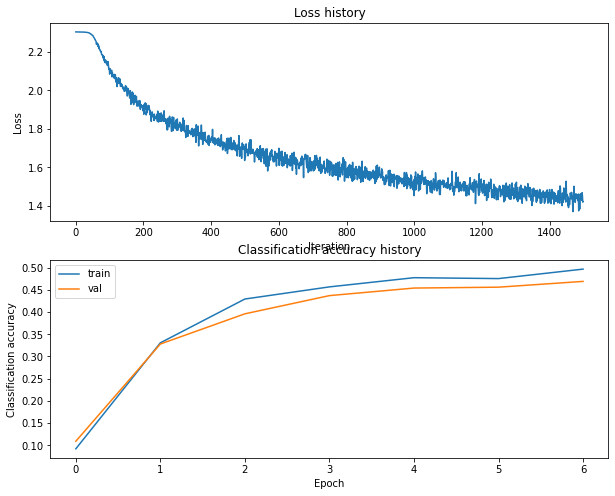

iteration 0 / 1500: loss 2.302656
iteration 100 / 1500: loss 2.087674
iteration 200 / 1500: loss 1.944983
iteration 300 / 1500: loss 1.800030
iteration 400 / 1500: loss 1.716070
iteration 500 / 1500: loss 1.682855
iteration 600 / 1500: loss 1.660644
iteration 700 / 1500: loss 1.593586
iteration 800 / 1500: loss 1.607431
iteration 900 / 1500: loss 1.552595
iteration 1000 / 1500: loss 1.542550
iteration 1100 / 1500: loss 1.493694
iteration 1200 / 1500: loss 1.515768
iteration 1300 / 1500: loss 1.487736
iteration 1400 / 1500: loss 1.491415
learning_rate 0.0005
regularization_strength 0.025
hidden_size 100
Validation accuracy:  0.468


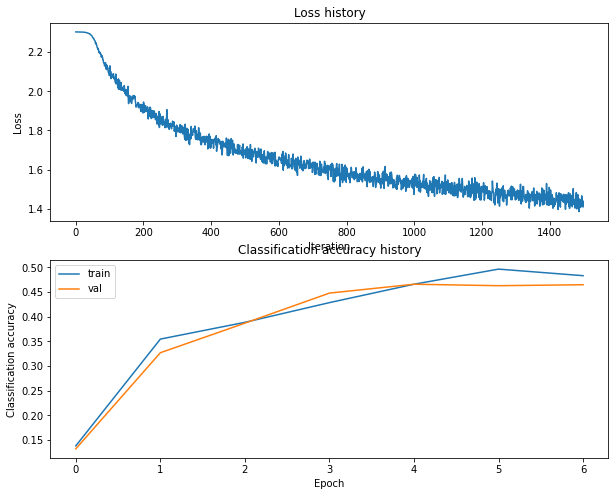

iteration 0 / 1500: loss 2.302686
iteration 100 / 1500: loss 2.102649
iteration 200 / 1500: loss 1.929904
iteration 300 / 1500: loss 1.816682
iteration 400 / 1500: loss 1.726728
iteration 500 / 1500: loss 1.670987
iteration 600 / 1500: loss 1.656784
iteration 700 / 1500: loss 1.545055
iteration 800 / 1500: loss 1.620811
iteration 900 / 1500: loss 1.552344
iteration 1000 / 1500: loss 1.530336
iteration 1100 / 1500: loss 1.465573
iteration 1200 / 1500: loss 1.493848
iteration 1300 / 1500: loss 1.468087
iteration 1400 / 1500: loss 1.417725
learning_rate 0.0005
regularization_strength 0.025
hidden_size 120
Validation accuracy:  0.473


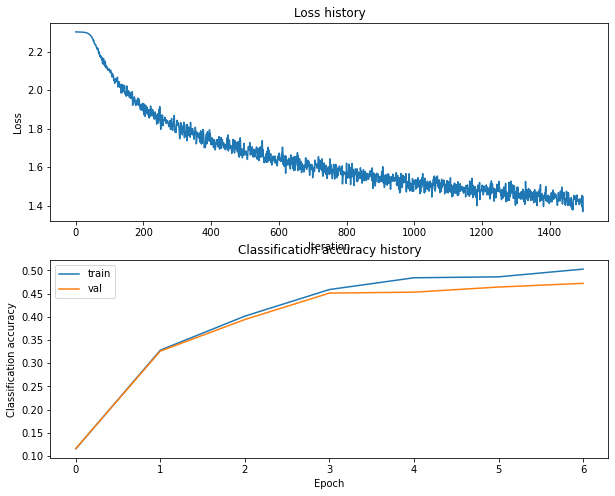

iteration 0 / 1500: loss 2.302705
iteration 100 / 1500: loss 2.112171
iteration 200 / 1500: loss 1.913293
iteration 300 / 1500: loss 1.860159
iteration 400 / 1500: loss 1.765387
iteration 500 / 1500: loss 1.702809
iteration 600 / 1500: loss 1.660051
iteration 700 / 1500: loss 1.623734
iteration 800 / 1500: loss 1.566841
iteration 900 / 1500: loss 1.507835
iteration 1000 / 1500: loss 1.498593
iteration 1100 / 1500: loss 1.569856
iteration 1200 / 1500: loss 1.467890
iteration 1300 / 1500: loss 1.497664
iteration 1400 / 1500: loss 1.516121
learning_rate 0.0005
regularization_strength 0.05
hidden_size 80
Validation accuracy:  0.467


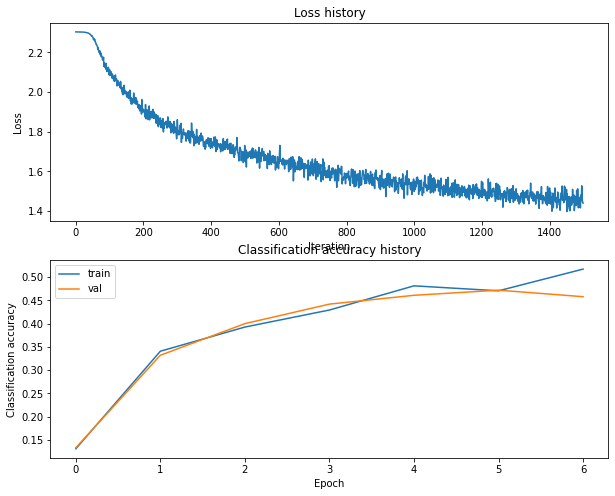

iteration 0 / 1500: loss 2.302760
iteration 100 / 1500: loss 2.119900
iteration 200 / 1500: loss 1.910277
iteration 300 / 1500: loss 1.791526
iteration 400 / 1500: loss 1.754810
iteration 500 / 1500: loss 1.695802
iteration 600 / 1500: loss 1.624053
iteration 700 / 1500: loss 1.592665
iteration 800 / 1500: loss 1.594296
iteration 900 / 1500: loss 1.581393
iteration 1000 / 1500: loss 1.526290
iteration 1100 / 1500: loss 1.475385
iteration 1200 / 1500: loss 1.520061
iteration 1300 / 1500: loss 1.462848
iteration 1400 / 1500: loss 1.431903
learning_rate 0.0005
regularization_strength 0.05
hidden_size 100
Validation accuracy:  0.486


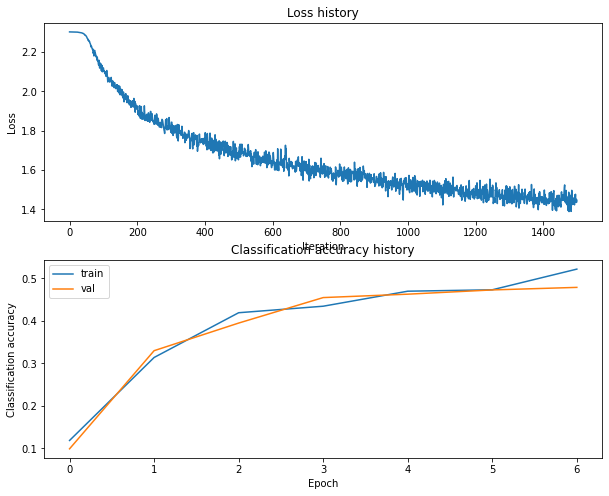

iteration 0 / 1500: loss 2.302771
iteration 100 / 1500: loss 2.094175
iteration 200 / 1500: loss 1.897405
iteration 300 / 1500: loss 1.819162
iteration 400 / 1500: loss 1.738324
iteration 500 / 1500: loss 1.680437
iteration 600 / 1500: loss 1.630952
iteration 700 / 1500: loss 1.616990
iteration 800 / 1500: loss 1.545763
iteration 900 / 1500: loss 1.573036
iteration 1000 / 1500: loss 1.538868
iteration 1100 / 1500: loss 1.516372
iteration 1200 / 1500: loss 1.473122
iteration 1300 / 1500: loss 1.435547
iteration 1400 / 1500: loss 1.465135
learning_rate 0.0005
regularization_strength 0.05
hidden_size 120
Validation accuracy:  0.484


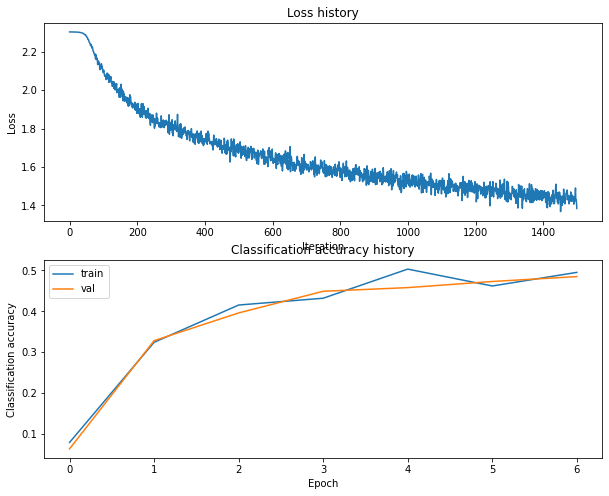

iteration 0 / 1500: loss 2.302609
iteration 100 / 1500: loss 1.900223
iteration 200 / 1500: loss 1.751497
iteration 300 / 1500: loss 1.605344
iteration 400 / 1500: loss 1.590404
iteration 500 / 1500: loss 1.529115
iteration 600 / 1500: loss 1.493748
iteration 700 / 1500: loss 1.457765
iteration 800 / 1500: loss 1.461711
iteration 900 / 1500: loss 1.317379
iteration 1000 / 1500: loss 1.362173
iteration 1100 / 1500: loss 1.328970
iteration 1200 / 1500: loss 1.335918
iteration 1300 / 1500: loss 1.287348
iteration 1400 / 1500: loss 1.239716
learning_rate 0.001
regularization_strength 0.01
hidden_size 80
Validation accuracy:  0.511


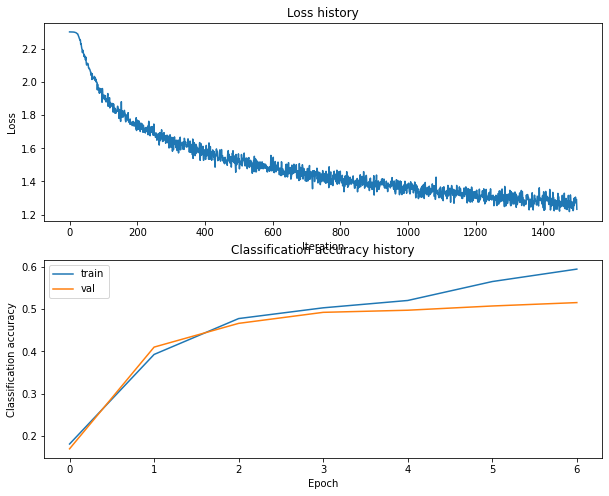

iteration 0 / 1500: loss 2.302588
iteration 100 / 1500: loss 1.898983
iteration 200 / 1500: loss 1.724523
iteration 300 / 1500: loss 1.619768
iteration 400 / 1500: loss 1.540106
iteration 500 / 1500: loss 1.536001
iteration 600 / 1500: loss 1.481159
iteration 700 / 1500: loss 1.391749
iteration 800 / 1500: loss 1.412756
iteration 900 / 1500: loss 1.361800
iteration 1000 / 1500: loss 1.391649
iteration 1100 / 1500: loss 1.365687
iteration 1200 / 1500: loss 1.294890
iteration 1300 / 1500: loss 1.275918
iteration 1400 / 1500: loss 1.278302
learning_rate 0.001
regularization_strength 0.01
hidden_size 100
Validation accuracy:  0.522


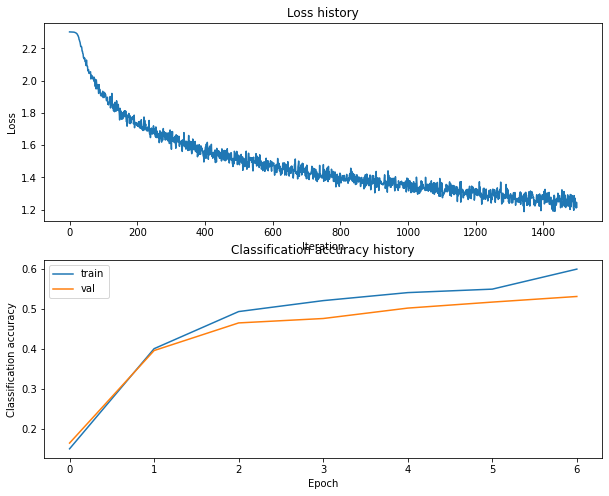

iteration 0 / 1500: loss 2.302641
iteration 100 / 1500: loss 1.877299
iteration 200 / 1500: loss 1.718211
iteration 300 / 1500: loss 1.629515
iteration 400 / 1500: loss 1.572557
iteration 500 / 1500: loss 1.513652
iteration 600 / 1500: loss 1.490624
iteration 700 / 1500: loss 1.411198
iteration 800 / 1500: loss 1.379254
iteration 900 / 1500: loss 1.325794
iteration 1000 / 1500: loss 1.354534
iteration 1100 / 1500: loss 1.302517
iteration 1200 / 1500: loss 1.323116
iteration 1300 / 1500: loss 1.275048
iteration 1400 / 1500: loss 1.262056
learning_rate 0.001
regularization_strength 0.01
hidden_size 120
Validation accuracy:  0.517


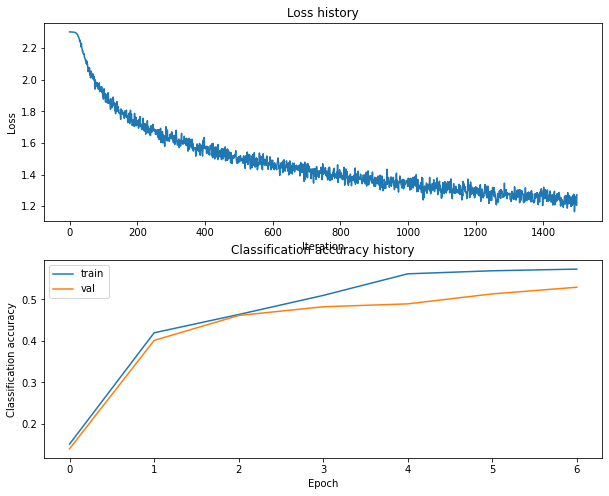

iteration 0 / 1500: loss 2.302642
iteration 100 / 1500: loss 1.901643
iteration 200 / 1500: loss 1.735396
iteration 300 / 1500: loss 1.642784
iteration 400 / 1500: loss 1.574457
iteration 500 / 1500: loss 1.556068
iteration 600 / 1500: loss 1.525207
iteration 700 / 1500: loss 1.458039
iteration 800 / 1500: loss 1.450202
iteration 900 / 1500: loss 1.440505
iteration 1000 / 1500: loss 1.417244
iteration 1100 / 1500: loss 1.354492
iteration 1200 / 1500: loss 1.360397
iteration 1300 / 1500: loss 1.276962
iteration 1400 / 1500: loss 1.267900
learning_rate 0.001
regularization_strength 0.025
hidden_size 80
Validation accuracy:  0.527


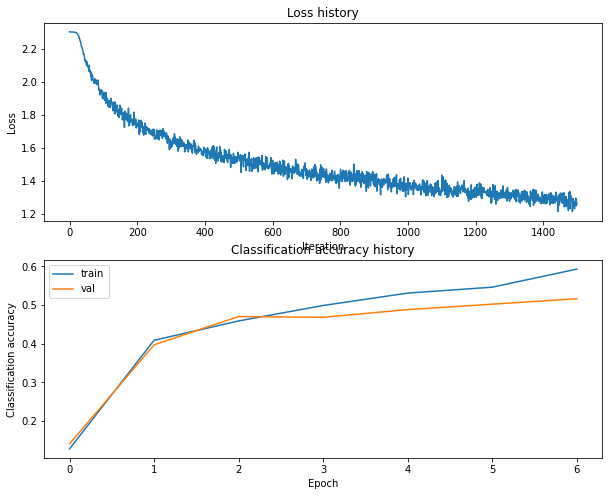

iteration 0 / 1500: loss 2.302653
iteration 100 / 1500: loss 1.908780
iteration 200 / 1500: loss 1.729497
iteration 300 / 1500: loss 1.636476
iteration 400 / 1500: loss 1.577435
iteration 500 / 1500: loss 1.436121
iteration 600 / 1500: loss 1.531239
iteration 700 / 1500: loss 1.464958
iteration 800 / 1500: loss 1.416947
iteration 900 / 1500: loss 1.404115
iteration 1000 / 1500: loss 1.384713
iteration 1100 / 1500: loss 1.314506
iteration 1200 / 1500: loss 1.319677
iteration 1300 / 1500: loss 1.310972
iteration 1400 / 1500: loss 1.282795
learning_rate 0.001
regularization_strength 0.025
hidden_size 100
Validation accuracy:  0.512


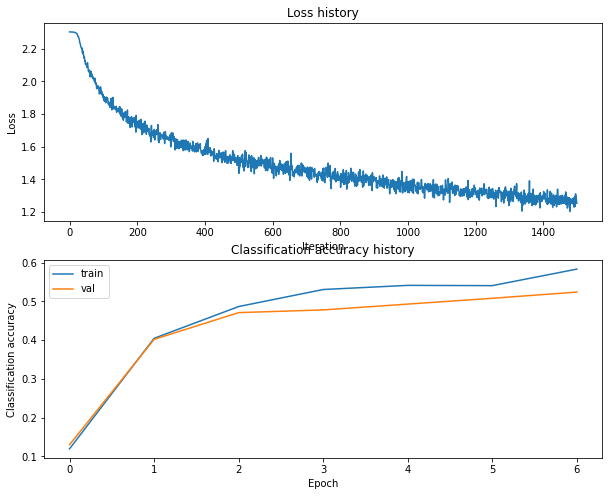

iteration 0 / 1500: loss 2.302687
iteration 100 / 1500: loss 1.913530
iteration 200 / 1500: loss 1.750796
iteration 300 / 1500: loss 1.645880
iteration 400 / 1500: loss 1.603420
iteration 500 / 1500: loss 1.523508
iteration 600 / 1500: loss 1.487294
iteration 700 / 1500: loss 1.430024
iteration 800 / 1500: loss 1.394407
iteration 900 / 1500: loss 1.369585
iteration 1000 / 1500: loss 1.331100
iteration 1100 / 1500: loss 1.289724
iteration 1200 / 1500: loss 1.300889
iteration 1300 / 1500: loss 1.267510
iteration 1400 / 1500: loss 1.258520
learning_rate 0.001
regularization_strength 0.025
hidden_size 120
Validation accuracy:  0.519


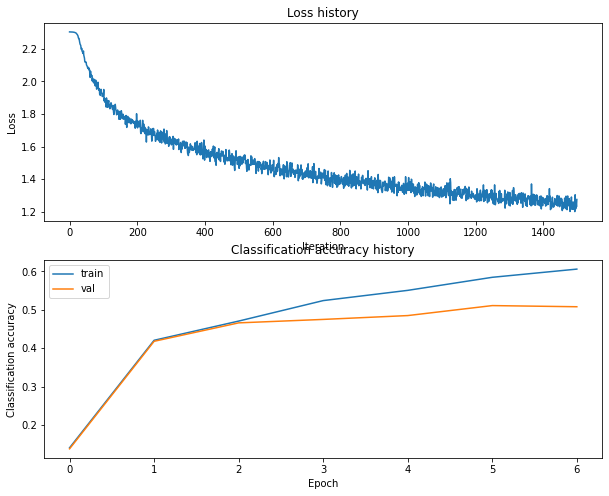

iteration 0 / 1500: loss 2.302697
iteration 100 / 1500: loss 1.927914
iteration 200 / 1500: loss 1.728506
iteration 300 / 1500: loss 1.669667
iteration 400 / 1500: loss 1.585460
iteration 500 / 1500: loss 1.491060
iteration 600 / 1500: loss 1.509014
iteration 700 / 1500: loss 1.477161
iteration 800 / 1500: loss 1.445217
iteration 900 / 1500: loss 1.367997
iteration 1000 / 1500: loss 1.318599
iteration 1100 / 1500: loss 1.303891
iteration 1200 / 1500: loss 1.335413
iteration 1300 / 1500: loss 1.245854
iteration 1400 / 1500: loss 1.285455
learning_rate 0.001
regularization_strength 0.05
hidden_size 80
Validation accuracy:  0.507


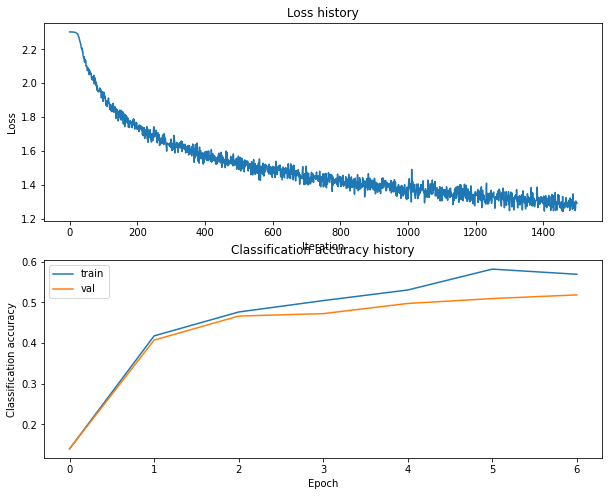

iteration 0 / 1500: loss 2.302740
iteration 100 / 1500: loss 1.913952
iteration 200 / 1500: loss 1.774591
iteration 300 / 1500: loss 1.607352
iteration 400 / 1500: loss 1.584821
iteration 500 / 1500: loss 1.565682
iteration 600 / 1500: loss 1.509088
iteration 700 / 1500: loss 1.454291
iteration 800 / 1500: loss 1.438181
iteration 900 / 1500: loss 1.410952
iteration 1000 / 1500: loss 1.412977
iteration 1100 / 1500: loss 1.345269
iteration 1200 / 1500: loss 1.309184
iteration 1300 / 1500: loss 1.334281
iteration 1400 / 1500: loss 1.296759
learning_rate 0.001
regularization_strength 0.05
hidden_size 100
Validation accuracy:  0.513


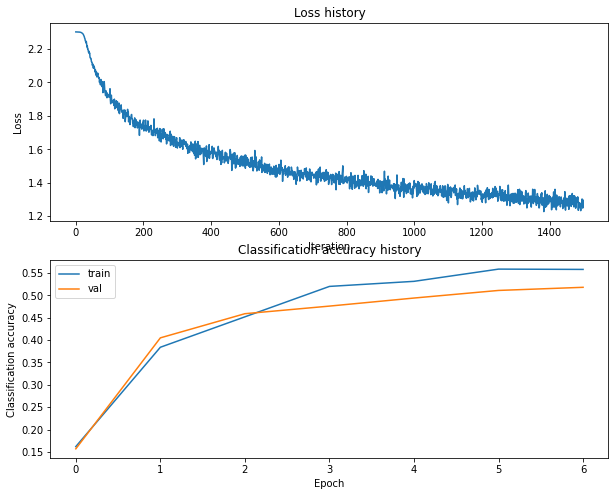

iteration 0 / 1500: loss 2.302766
iteration 100 / 1500: loss 1.896668
iteration 200 / 1500: loss 1.736690
iteration 300 / 1500: loss 1.638128
iteration 400 / 1500: loss 1.585004
iteration 500 / 1500: loss 1.510994
iteration 600 / 1500: loss 1.452391
iteration 700 / 1500: loss 1.392269
iteration 800 / 1500: loss 1.445897
iteration 900 / 1500: loss 1.399568
iteration 1000 / 1500: loss 1.370364
iteration 1100 / 1500: loss 1.347432
iteration 1200 / 1500: loss 1.338704
iteration 1300 / 1500: loss 1.290448
iteration 1400 / 1500: loss 1.241922
learning_rate 0.001
regularization_strength 0.05
hidden_size 120
Validation accuracy:  0.524


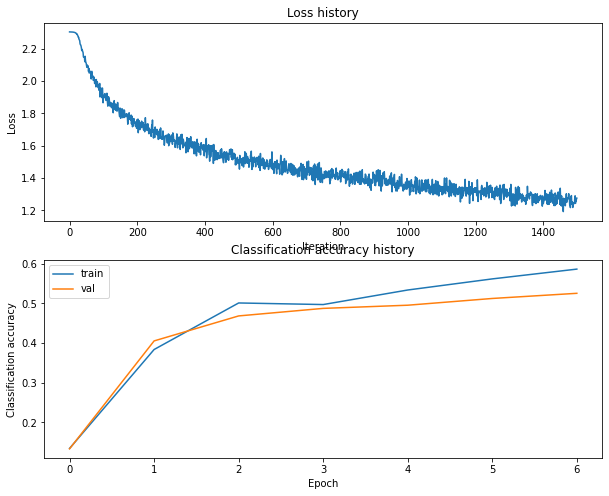

iteration 0 / 1500: loss 2.302616


/content/cs231n/classifiers/neural_net.py:106: RuntimeWarning: divide by zero encountered in log
  loss = np.sum(-np.log(scores[correct_class_index]))


iteration 100 / 1500: loss inf
iteration 200 / 1500: loss inf
iteration 300 / 1500: loss inf
iteration 400 / 1500: loss inf
iteration 500 / 1500: loss inf
iteration 600 / 1500: loss inf
iteration 700 / 1500: loss inf
iteration 800 / 1500: loss inf
iteration 900 / 1500: loss inf
iteration 1000 / 1500: loss inf


/content/cs231n/classifiers/neural_net.py:84: RuntimeWarning: overflow encountered in matmul
  scores = np.matmul(a1, W2) + b2
/content/cs231n/classifiers/neural_net.py:103: RuntimeWarning: overflow encountered in subtract
  scores -= np.amax(scores, axis=1)[:,np.newaxis]
/content/cs231n/classifiers/neural_net.py:103: RuntimeWarning: invalid value encountered in subtract
  scores -= np.amax(scores, axis=1)[:,np.newaxis]
/content/cs231n/classifiers/neural_net.py:129: RuntimeWarning: invalid value encountered in less_equal
  da1[z1<=0] = 0


iteration 1100 / 1500: loss nan
iteration 1200 / 1500: loss nan
iteration 1300 / 1500: loss nan
iteration 1400 / 1500: loss nan
learning_rate 0.005
regularization_strength 0.01
hidden_size 80
Validation accuracy:  0.087


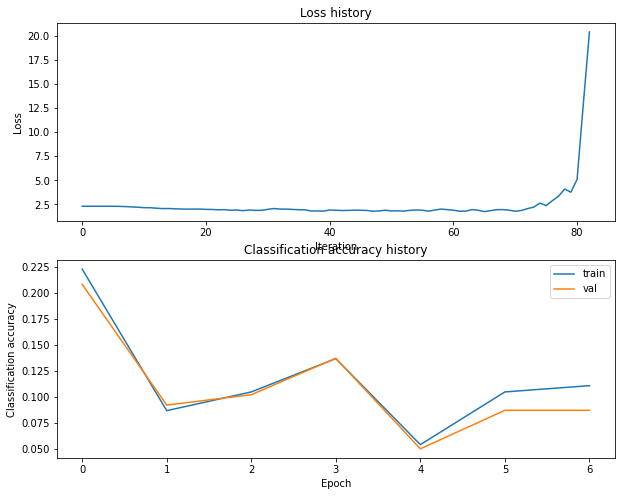

iteration 0 / 1500: loss 2.302642
iteration 100 / 1500: loss 1.702774
iteration 200 / 1500: loss inf
iteration 300 / 1500: loss inf
iteration 400 / 1500: loss inf
iteration 500 / 1500: loss inf
iteration 600 / 1500: loss inf
iteration 700 / 1500: loss inf
iteration 800 / 1500: loss inf
iteration 900 / 1500: loss inf
iteration 1000 / 1500: loss inf
iteration 1100 / 1500: loss inf
iteration 1200 / 1500: loss nan
iteration 1300 / 1500: loss nan
iteration 1400 / 1500: loss nan
learning_rate 0.005
regularization_strength 0.01
hidden_size 100
Validation accuracy:  0.087


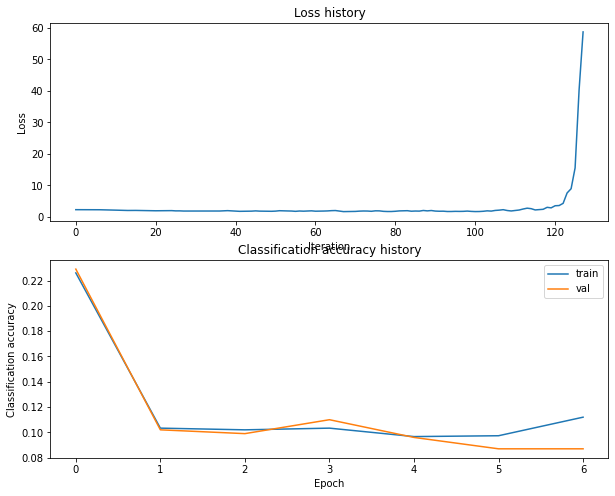

iteration 0 / 1500: loss 2.302623
iteration 100 / 1500: loss 1.786362
iteration 200 / 1500: loss inf
iteration 300 / 1500: loss inf
iteration 400 / 1500: loss inf
iteration 500 / 1500: loss inf
iteration 600 / 1500: loss inf
iteration 700 / 1500: loss inf
iteration 800 / 1500: loss inf
iteration 900 / 1500: loss inf
iteration 1000 / 1500: loss inf
iteration 1100 / 1500: loss inf
iteration 1200 / 1500: loss inf
iteration 1300 / 1500: loss inf
iteration 1400 / 1500: loss nan
learning_rate 0.005
regularization_strength 0.01
hidden_size 120
Validation accuracy:  0.087


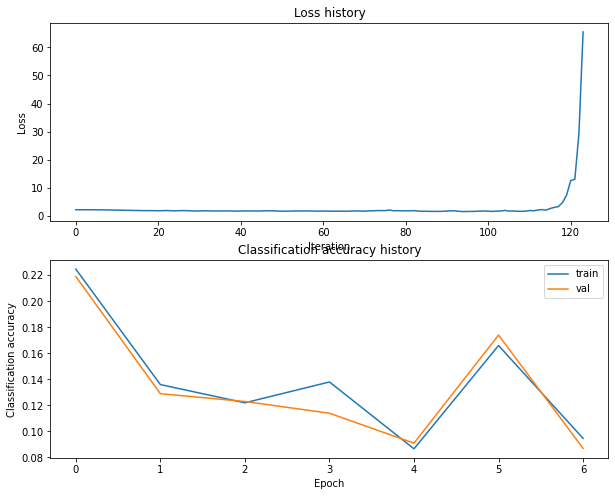

iteration 0 / 1500: loss 2.302623
iteration 100 / 1500: loss 1.795316
iteration 200 / 1500: loss inf
iteration 300 / 1500: loss inf
iteration 400 / 1500: loss inf
iteration 500 / 1500: loss inf
iteration 600 / 1500: loss inf
iteration 700 / 1500: loss inf
iteration 800 / 1500: loss inf
iteration 900 / 1500: loss inf
iteration 1000 / 1500: loss inf
iteration 1100 / 1500: loss inf
iteration 1200 / 1500: loss inf
iteration 1300 / 1500: loss nan
iteration 1400 / 1500: loss nan
learning_rate 0.005
regularization_strength 0.025
hidden_size 80
Validation accuracy:  0.087


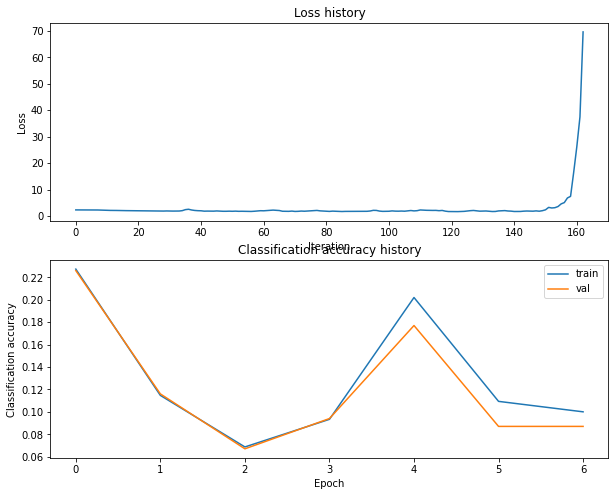

iteration 0 / 1500: loss 2.302630
iteration 100 / 1500: loss 2.015841
iteration 200 / 1500: loss inf
iteration 300 / 1500: loss inf
iteration 400 / 1500: loss inf
iteration 500 / 1500: loss inf
iteration 600 / 1500: loss inf
iteration 700 / 1500: loss inf
iteration 800 / 1500: loss inf
iteration 900 / 1500: loss inf
iteration 1000 / 1500: loss inf
iteration 1100 / 1500: loss inf
iteration 1200 / 1500: loss inf
iteration 1300 / 1500: loss inf
iteration 1400 / 1500: loss nan
learning_rate 0.005
regularization_strength 0.025
hidden_size 100
Validation accuracy:  0.087


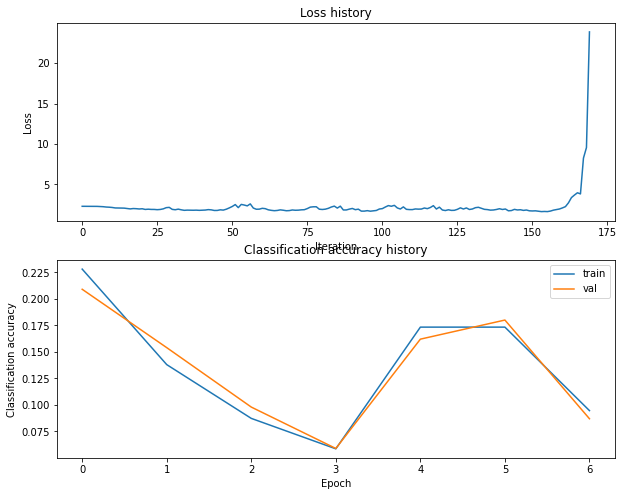

iteration 0 / 1500: loss 2.302702
iteration 100 / 1500: loss 1.710835
iteration 200 / 1500: loss inf
iteration 300 / 1500: loss inf
iteration 400 / 1500: loss inf
iteration 500 / 1500: loss inf
iteration 600 / 1500: loss inf
iteration 700 / 1500: loss inf
iteration 800 / 1500: loss inf
iteration 900 / 1500: loss inf
iteration 1000 / 1500: loss inf
iteration 1100 / 1500: loss inf
iteration 1200 / 1500: loss nan
iteration 1300 / 1500: loss nan
iteration 1400 / 1500: loss nan
learning_rate 0.005
regularization_strength 0.025
hidden_size 120
Validation accuracy:  0.087


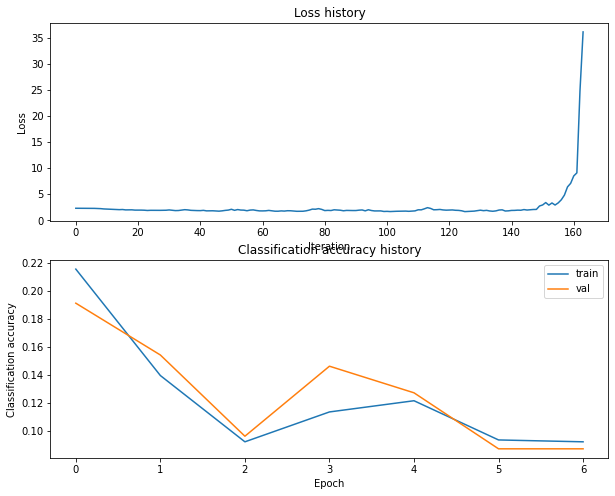

iteration 0 / 1500: loss 2.302691
iteration 100 / 1500: loss 2.052716
iteration 200 / 1500: loss inf
iteration 300 / 1500: loss inf
iteration 400 / 1500: loss inf
iteration 500 / 1500: loss inf
iteration 600 / 1500: loss inf
iteration 700 / 1500: loss inf
iteration 800 / 1500: loss inf
iteration 900 / 1500: loss inf
iteration 1000 / 1500: loss inf
iteration 1100 / 1500: loss inf
iteration 1200 / 1500: loss inf
iteration 1300 / 1500: loss inf
iteration 1400 / 1500: loss inf
learning_rate 0.005
regularization_strength 0.05
hidden_size 80
Validation accuracy:  0.156


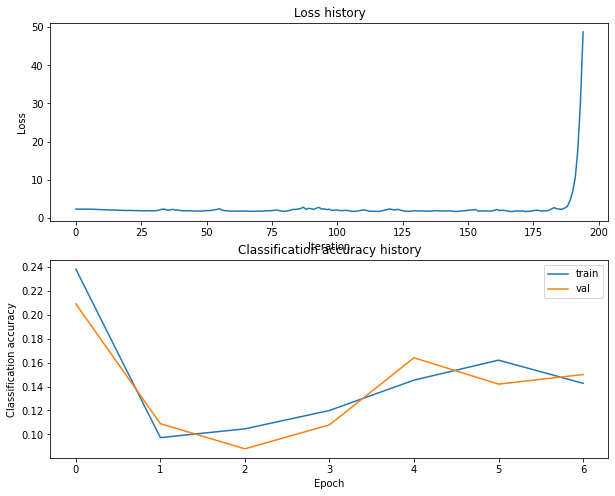

iteration 0 / 1500: loss 2.302743
iteration 100 / 1500: loss 1.970311
iteration 200 / 1500: loss inf
iteration 300 / 1500: loss inf
iteration 400 / 1500: loss inf
iteration 500 / 1500: loss inf
iteration 600 / 1500: loss inf
iteration 700 / 1500: loss inf
iteration 800 / 1500: loss inf
iteration 900 / 1500: loss inf
iteration 1000 / 1500: loss inf
iteration 1100 / 1500: loss inf
iteration 1200 / 1500: loss inf
iteration 1300 / 1500: loss nan
iteration 1400 / 1500: loss nan
learning_rate 0.005
regularization_strength 0.05
hidden_size 100
Validation accuracy:  0.087


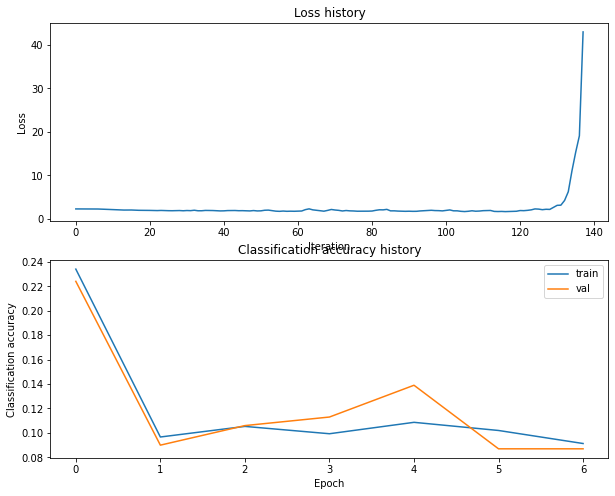

iteration 0 / 1500: loss 2.302776
iteration 100 / 1500: loss 1.747821
iteration 200 / 1500: loss inf
iteration 300 / 1500: loss inf
iteration 400 / 1500: loss inf
iteration 500 / 1500: loss inf
iteration 600 / 1500: loss inf
iteration 700 / 1500: loss inf
iteration 800 / 1500: loss inf
iteration 900 / 1500: loss inf
iteration 1000 / 1500: loss inf
iteration 1100 / 1500: loss inf
iteration 1200 / 1500: loss nan
iteration 1300 / 1500: loss nan
iteration 1400 / 1500: loss nan
learning_rate 0.005
regularization_strength 0.05
hidden_size 120
Validation accuracy:  0.087


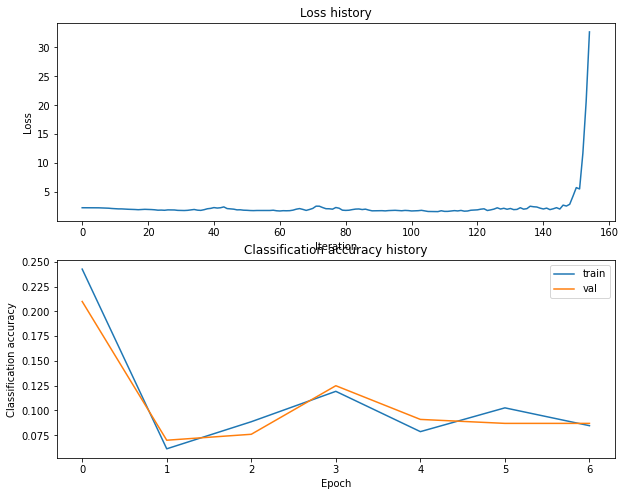

In [0]:
# Fine tuning

best_net = None # store the best model into this 
best_val = -1
best_hyperparms = {}

learning_rates = [5e-4, 1e-3, 5e-3]
regularization_strengths = [1e-2, 2.5e-2, 5e-2]

input_size = 32 * 32 * 3
hidden_sizes = [80,100,120]
num_classes = 10

for learning_rate in learning_rates:
    for regularization_strength in regularization_strengths:
        for hidden_size in hidden_sizes:
            net = TwoLayerNet(input_size, hidden_size, num_classes)

            # Train the network
            stats = net.train(X_train, y_train, X_val, y_val,
                        num_iters=1500, batch_size=200,
                        learning_rate=learning_rate, learning_rate_decay=0.95,
                        reg=regularization_strength, verbose=True)
            
            print("learning_rate", learning_rate)
            print("regularization_strength", regularization_strength)
            print("hidden_size", hidden_size)
            # Predict on the validation set
            val_acc = (net.predict(X_val) == y_val).mean()
            print('Validation accuracy: ', val_acc)

            plt.figure()
            plt.subplot(2, 1, 1)
            plt.plot(stats['loss_history'])
            plt.title('Loss history')
            plt.xlabel('Iteration')
            plt.ylabel('Loss')

            plt.subplot(2, 1, 2)
            plt.plot(stats['train_acc_history'], label='train')
            plt.plot(stats['val_acc_history'], label='val')
            plt.title('Classification accuracy history')
            plt.xlabel('Epoch')
            plt.ylabel('Classification accuracy')
            plt.legend()
            plt.show()            

            if val_acc > best_val:
                best_val = val_acc
                best_net = net
                best_hyperparms["learning_rate"] = learning_rate
                best_hyperparms["regularization_strength"] = regularization_strength
                best_hyperparms["hidden_sizes"] = hidden_size

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

In [0]:
# Print your validation accuracy: this should be above 48%
val_acc = (best_net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

Validation accuracy:  0.527


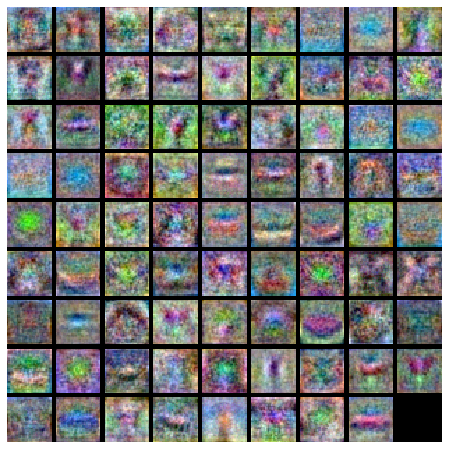

In [0]:
# Visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [0]:
# Print your test accuracy: this should be above 48%
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.52


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$

$\color{blue}{\textit Your Explanation:}$



---
# IMPORTANT

This is the end of this question. Please do the following:

1. Click `File -> Save` to make sure the latest checkpoint of this notebook is saved to your Drive.
2. Execute the cell below to download the modified `.py` files back to your drive.

In [0]:
import os

FOLDER_TO_SAVE = os.path.join('drive/My Drive/', FOLDERNAME)
FILES_TO_SAVE = ['cs231n/classifiers/neural_net.py']

for files in FILES_TO_SAVE:
  with open(os.path.join(FOLDER_TO_SAVE, '/'.join(files.split('/')[1:])), 'w') as f:
    f.write(''.join(open(files).readlines()))